<a href="https://colab.research.google.com/github/TantiCantik/Tugas_DL_TM4/blob/main/Tugas_DL_TM4/TugasDLTM4/running_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'fruits:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F5857%2F2609027%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240502%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240502T014628Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D5d81a7c8fb4057a3067bb44562a9a9b1784664de7748838616aed0f3b70feed1ce07d4ce859412f02f208cc313be62f7eaf955febaf697bdd25145e88ace1338e5ed41edaee041b706a4799c84a2f18db1ffdbc73831cda1a9693914898e0b5d87f95f8932e4f212d10aef5f2373633e8f558cb161628b9879db4be14e5d735e2660ef96ead16a7cfca22e83683684e889bd298e4a3d0f307d9ed4a7cfcd00b4ebc8e15b13052cf3ec4c61ede878a94def0f34ec46348b8f212e3fd60fe327a944624d0baed881cf7e179afc7c49c3b5205161bc73c53572aa7d881a0da8ce1a7725c0637e228218d487c9733a0965c590620105ab804b6bf3a4069a200a6520'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 1379678841 bytes downloaded
Downloaded and uncompressed: fruits
Data source import complete.


<h1><center>Fruit 360 Dataset</center></h1>

<center><img src="https://www.researchgate.net/publication/342916129/figure/fig2/AS:913043131207680@1594697854025/Illustration-of-few-images-from-Fruits-360-dataset.ppm"></center>

# **Contents**

1. [Import data and python packages](#t1.)


2. [Data visualization](#t2.)


3. [Classification (CNN)](#t3.)


4. [Prediction](#t4.)

<a id="t1."></a>
# 1. Import data and python packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import time
import os
from IPython.display import clear_output

In [4]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models

In [3]:
from sklearn.preprocessing import LabelEncoder

In [5]:
sample_size = 200
width = 50
height = 50

In [7]:
files = []
adress = '/kaggle/input/fruits/fruits-360_dataset/fruits-360/Training/{}'
os.chdir('/kaggle/input/fruits/fruits-360_dataset/fruits-360/Training')
for i in os.listdir(os.getcwd()):
    files.append(i)

In [8]:
data = {}
for f in files:
    data[f]=[]
for col in files:
    os.chdir(adress.format(col))
    for i in os.listdir(os.getcwd()):
        if i.endswith('.jpg'):
            data[col].append(i)

In [9]:
start = time.time()
image_data = []
image_target = []

for title in files:
    os.chdir(adress.format(title))
    counter = 0
    for i in data[title]:
        img = cv2.imread(i)
        image_data.append(cv2.resize(img,(width, height)))
        image_target.append(title)
        counter += 1
        if counter == sample_size:
            break
    clear_output(wait=True)
    print("Compiled Class",title)
calculate_time = time.time() - start
print("Calculate Time",round(calculate_time,5))

Compiled Class Apple Golden 2
Calculate Time 8.86676


In [10]:
start = time.time()
image_data_test = []
image_target_test = []

for title in files:
    os.chdir(adress.format(title))
    sayac = 0
    for i in data[title][sample_size:]:
        img = cv2.imread(i)
        image_data_test.append(cv2.resize(img,(width, height)))
        image_target_test.append(title)
        sayac += 1
        if sayac == 50:
            break
    clear_output(wait=True)
    print("Compiled Class",title)
calculate_time = time.time() - start
print("Calculate Time",round(calculate_time,5))

Compiled Class Apple Golden 2
Calculate Time 3.21974


In [11]:
image_data = np.array(image_data)
size = image_data.shape[0]
image_data.shape

(26200, 50, 50, 3)

In [12]:
image_data_test = np.array(image_data_test)
size = image_data_test.shape[0]
image_data_test.shape

(6550, 50, 50, 3)

<a id="t2."></a>
# 2. Data visualization

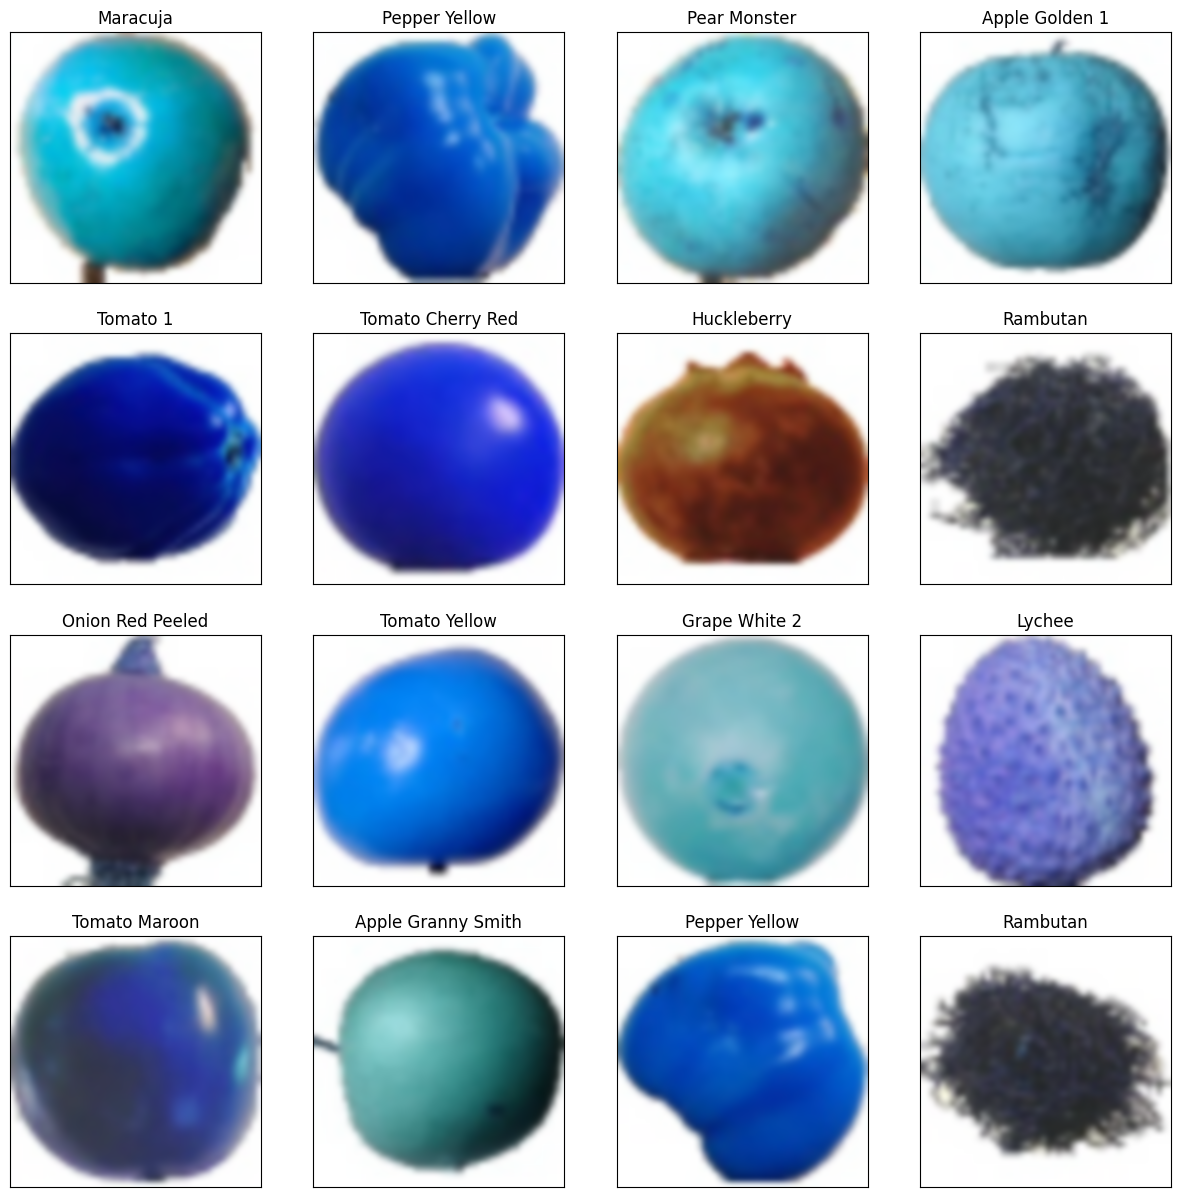

In [13]:
plt.figure(figsize=(15,15))
for i in range(1,17):
    fig = np.random.choice(np.arange(1,size+1))
    plt.subplot(4,4,i)
    plt.imshow(image_data[fig], cmap="gray", origin='upper', interpolation = 'bicubic')
    plt.title(image_target[fig])
    plt.xticks([]), plt.yticks([])
plt.show()

<a id="t3."></a>
# 3. Classification (CNN)

In [14]:
labels = LabelEncoder()
labels.fit(image_target)

LabelEncoder()

In [15]:
train_images = image_data / 255.0
train_labels = labels.transform(image_target)

In [16]:
test_images = image_data_test / 255.0
test_labels = labels.transform(image_target_test)

In [17]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(width,height,3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [18]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(131))

In [19]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=8,
                    validation_data=(test_images, test_labels))

Epoch 1/8
819/819 [==============================] - 112s 135ms/step - loss: 1.1125 - accuracy: 0.7193 - val_loss: 0.2078 - val_accuracy: 0.9373
Epoch 2/8
819/819 [==============================] - 99s 121ms/step - loss: 0.1202 - accuracy: 0.9616 - val_loss: 0.0904 - val_accuracy: 0.9708
Epoch 3/8
819/819 [==============================] - 103s 125ms/step - loss: 0.0635 - accuracy: 0.9811 - val_loss: 0.1554 - val_accuracy: 0.9672
Epoch 4/8
819/819 [==============================] - 99s 121ms/step - loss: 0.0555 - accuracy: 0.9845 - val_loss: 0.0486 - val_accuracy: 0.9866
Epoch 5/8
819/819 [==============================] - 99s 121ms/step - loss: 0.0429 - accuracy: 0.9871 - val_loss: 0.0207 - val_accuracy: 0.9944
Epoch 6/8
819/819 [==============================] - 100s 122ms/step - loss: 0.0401 - accuracy: 0.9889 - val_loss: 0.0143 - val_accuracy: 0.9959
Epoch 7/8
819/819 [==============================] - 99s 121ms/step - loss: 0.0141 - accuracy: 0.9969 - val_loss: 0.3340 - val_accura

205/205 - 7s - loss: 0.0542 - accuracy: 0.9849 - 7s/epoch - 33ms/step


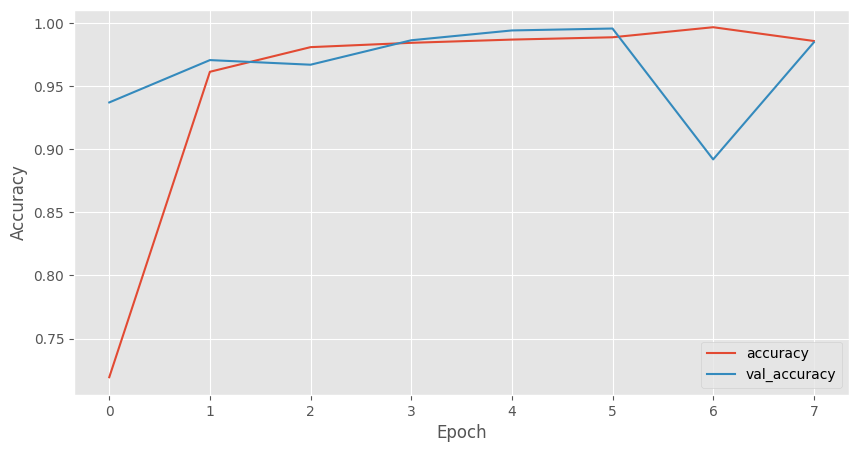

In [20]:
plt.style.use('ggplot')
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

<a id="t4."></a>
# 4. Prediction

In [21]:
def Prediction(image):

    global width, height, files, labels

    #img = cv2.resize(image,(width,height))

    test = img / 255.0

    pred = model.predict(np.array([image])).argmax()

    return labels.inverse_transform([pred])[0]

1/1 [==============================] - 0s 23ms/step


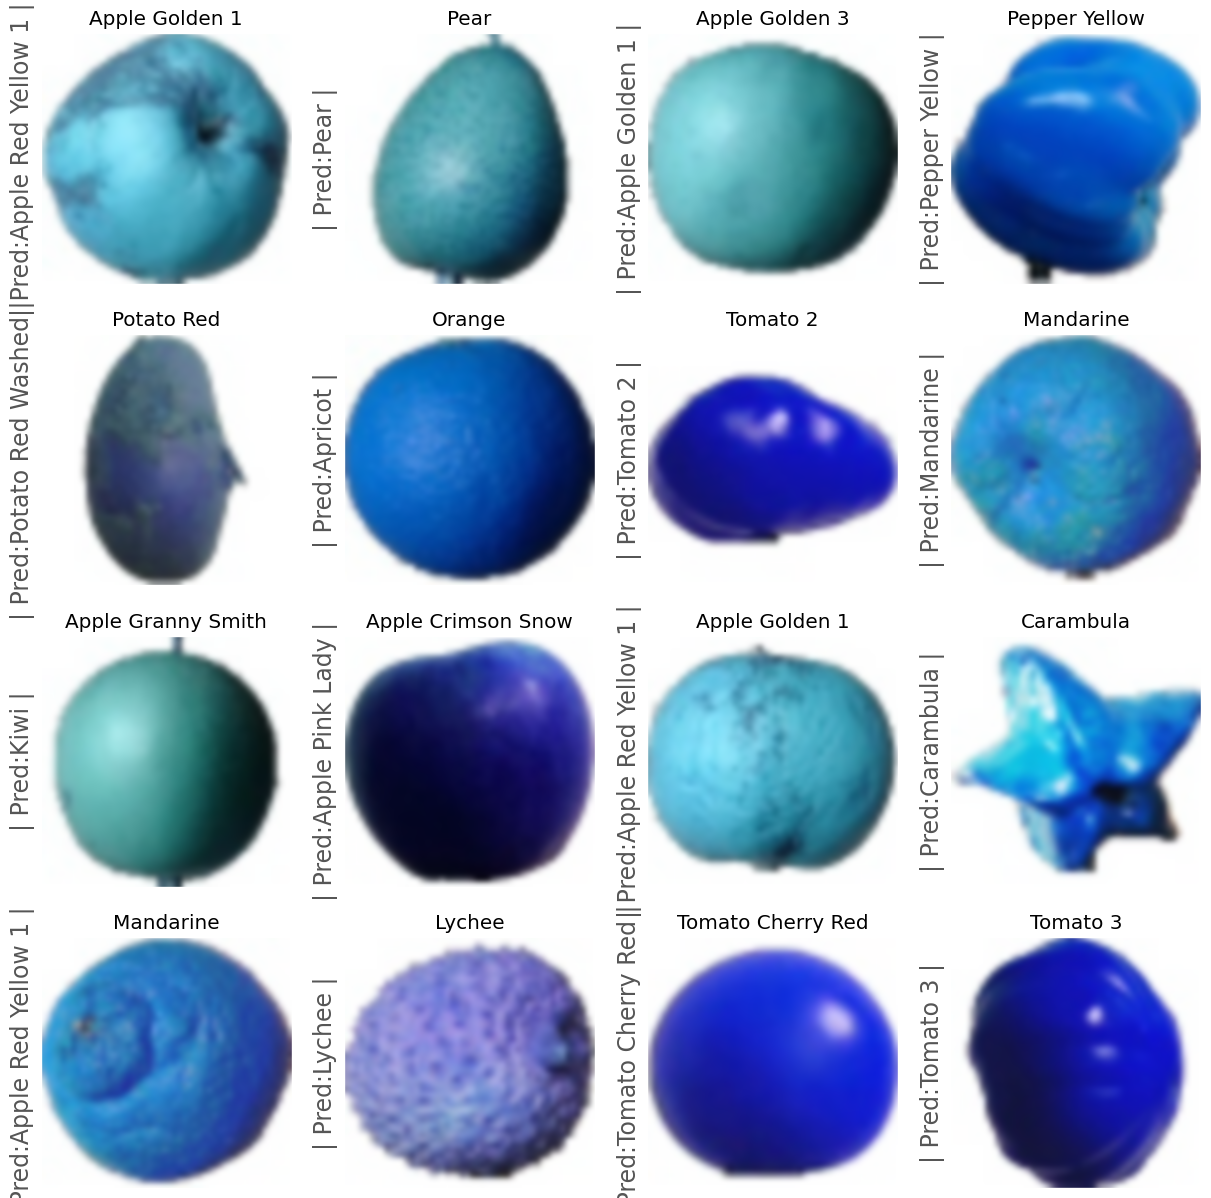

In [22]:
plt.figure(figsize=(15,15))
for i in range(1,17):
    fig = np.random.choice(np.arange(1,size+1))
    plt.subplot(4,4,i)
    plt.imshow(image_data[fig], cmap="gray", origin='upper', interpolation = 'bicubic')
    plt.title(image_target[fig])
    plt.ylabel("| Pred:{} |".format(Prediction(image_data[fig])),fontsize=17)
    plt.xticks([]), plt.yticks([])
plt.show()